Highly nonlinear oscillator:

Recall the numerical solution for oscillations of a spring with power p = 12 (use $F=-0.01y[0]^{11}$). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal. (Landau 289)

Warning: please only sample the data within one period

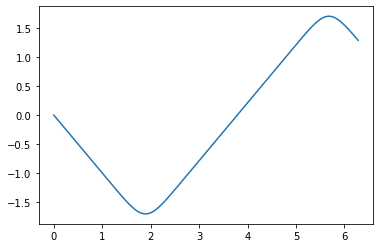

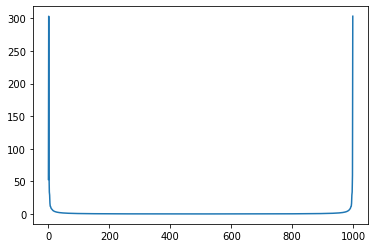

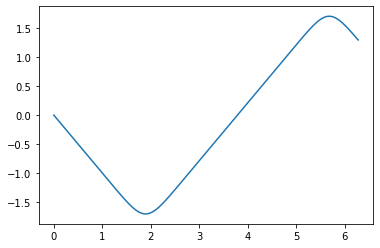

In [29]:
from numpy import *
import matplotlib.pyplot as plt
import cmath

#-----------------Generate Signal----------------

#   Initialization
a = 0.
b = 2.*pi
n = 1000                                         
ydumb = zeros((2), float);    y = zeros((2), float)
fReturn = zeros((2), float);  k1 = zeros((2), float)
k2 = zeros((2), float);       k3 = zeros((2), float) 
k4 = zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=array([0.0])
yp=array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]
    fReturn[1] = -0.01*y[0]**11                         #F=-0.01y[0]^11
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=append(xp, t)
    yp=append(yp,y[0])

#----------------Fourier Analysis-------------------

signal = yp    
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/n
dftz   = zeros( (n), complex )                  # Complex elements
idftz   = zeros( (n), complex )
xa = xp   
nplot = zeros( n, float )   
fplot = zeros( n, float ) 
ifplot = zeros( n, float )
xplot = zeros( n, float )
       
      
def fourier(dftz):                                              # DFT
    for i in range(0, n):              # the n frequency
      zsum = complex(0.0, 0.0)                
      for  j in range(0, n):                              
          zexpo = complex(0, twopi*j*i/n)           # Complex exponent
          zsum += signal[j]*exp(-zexpo)       #signal[j] is y[k]
      dftz[i] = zsum * sq2pi      
      nplot[i] = i
      fplot[i] = sqrt(dftz[i].imag*dftz[i].imag+dftz[i].real*dftz[i].real)


    
def invfourier(idftz,dftz):                                              # IDFT
    for i in range(0, n):              # the n frequency
      zsum = complex(0.0, 0.0)                
      for  j in range(0, n):                              
        zexpo = complex(0, twopi*j*i/n)               # Complex exponent
        zsum += dftz[j]*exp(zexpo)                    #dftx[j] is Y[n]
      idftz[i] = zsum * 1./sq2pi/n      
      xplot[i] = i*twopi/n
      ifplot[i] = idftz[i].real

    
fourier(dftz)              # Call signal, transform

invfourier(idftz,dftz)          # Inv. transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.show()
plt.plot(xplot,ifplot)
plt.show()

Above, we have the unfiltered Inverse Fourier Transform which reproduces the signal almost exactly.

$\textbf{Now}$, we remove any harmonics that contribute less than 10% of our lowest harmonic. In other words, we exclude any harmonics for which $b_n/b_1 < 0.1 \Rightarrow \boxed{Y_n/Y_1 < 0.1}$.

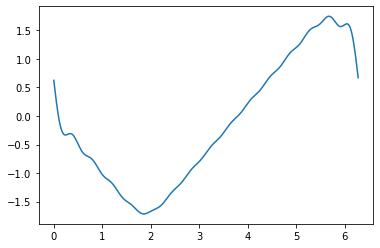

In [31]:
def invfourier(idftz,dftz):                                              # IDFT
    for i in range(0, n):              # the n frequency
      zsum = complex(0.0, 0.0)                
      for  j in range(0, n):                              
        zexpo = complex(0, twopi*j*i/n)               # Complex exponent
        if (fplot[j]/fplot[0] <= 0.1): dftz[j]=0      #****Filter for Y[n]/Y[0] < 0.1 ****
        zsum += dftz[j]*exp(zexpo)                    #dftx[j] is Y[n]
      idftz[i] = zsum * 1./sq2pi/n      
      xplot[i] = i*twopi/n
      ifplot[i] = idftz[i].real

    
invfourier(idftz,dftz)          # FILTERED Inv. transform
plt.plot(xplot,ifplot)
plt.show()

We can see that the general shape of the plot is conserved while there is a loss in small-scale accuracy.